### Experiments Notebook

In [17]:
from pattern import Pattern
import time

p1 = Pattern(['x', 'x'])
p2 = Pattern(['1', 'x'])

print(p1 == p2)  # False
print(p1.is_ancestor_of(p2))  # True
print(p1.get_dimension())  # 2
print(p1.get_level())  # 0
print(p1.find_right_most_deterministic_index())  # -1
print(p1.find_right_most_non_deterministic_index())  # 1)

False
True
2
0
-1
1


In [18]:
import pandas as pd

df = pd.read_csv('airbnb_1000.csv').dropna()
attributes = [1,4,6]
df = df.iloc[:, attributes]

#print few rows of the dataset
print(df.head())

#create array with cardinalities of each attribute
cardinalities = [len(df.iloc[:,i].unique()) for i in range(len(attributes))]
f'Attributes cardinalities:{cardinalities}'

  Accommodates  Beds  Air Conditioning
0            6   2.0                 1
1            4   2.0                 0
2            3   1.0                 1
3            2   1.0                 1
4            2   1.0                 0


'Attributes cardinalities:[16, 15, 2]'

In [23]:
from patternBreaker import PatternBreaker
algorithm = PatternBreaker('airbnb_1000.csv', 3, [1,2,3])
start_time = time.time()
mups_pattern_breaker = algorithm.find_max_uncovered_pattern_set(3)
pattern_breaker_time = time.time() - start_time
print(f'There are {len(mups_pattern_breaker)} MUPs!\n')
print(f'Execution time: {pattern_breaker_time} seconds')
for mup in mups_pattern_breaker:
    print(mup)

There are 370 MUPs!

Execution time: 0.4497511386871338 seconds
14,x,x (cov:2)
15,x,x (cov:1)
x,10,x (cov:2)
x,15,x (cov:2)
x,x,7 (cov:2)
0,5,x (cov:2)
0,6,x (cov:1)
0,7,x (cov:0)
0,8,x (cov:0)
0,9,x (cov:0)
0,11,x (cov:0)
0,12,x (cov:0)
0,13,x (cov:0)
0,14,x (cov:0)
0,x,4 (cov:1)
0,x,5 (cov:0)
0,x,6 (cov:0)
0,x,8 (cov:0)
1,2,x (cov:2)
1,5,x (cov:0)
1,6,x (cov:0)
1,7,x (cov:0)
1,8,x (cov:0)
1,9,x (cov:0)
1,11,x (cov:0)
1,12,x (cov:1)
1,13,x (cov:0)
1,14,x (cov:0)
1,x,2 (cov:0)
1,x,5 (cov:0)
1,x,6 (cov:0)
1,x,8 (cov:0)
2,2,x (cov:1)
2,4,x (cov:0)
2,5,x (cov:0)
2,6,x (cov:0)
2,7,x (cov:2)
2,8,x (cov:0)
2,9,x (cov:1)
2,11,x (cov:0)
2,12,x (cov:1)
2,13,x (cov:0)
2,14,x (cov:0)
2,x,2 (cov:0)
2,x,3 (cov:0)
2,x,5 (cov:0)
2,x,6 (cov:0)
2,x,8 (cov:0)
3,2,x (cov:2)
3,4,x (cov:0)
3,5,x (cov:0)
3,6,x (cov:1)
3,8,x (cov:0)
3,9,x (cov:0)
3,11,x (cov:0)
3,13,x (cov:0)
3,14,x (cov:0)
3,x,2 (cov:0)
3,x,3 (cov:1)
3,x,5 (cov:0)
3,x,6 (cov:0)
3,x,8 (cov:0)
4,2,x (cov:1)
4,4,x (cov:1)
4,5,x (cov:0)
4,6,x (

### PatterCombiner

#### We can observe that the first MUPs (stored in a list and appended sequentially) were fully deterministic, in contrast to the breaker. This reflects a clear bottom-up approach.

In [22]:
from patternCombiner import PatternCombiner
algorithm = PatternCombiner('airbnb_1000.csv', 3, [1,2,3])
start_time = time.time()
mups_pattern_combiner = algorithm.find_max_uncovered_pattern_set(3)
pattern_combiner_time = time.time() - start_time
print(f'There are {len(mups_pattern_combiner)} MUPs!\n')
print(f'Execution time: {pattern_combiner_time} seconds')
for mup in mups_pattern_combiner:
    print(mup)

There are 370 MUPs!

Execution time: 0.7332918643951416 seconds
0,0,1 (cov:0)
0,2,0 (cov:1)
0,2,1 (cov:1)
0,2,2 (cov:1)
0,3,2 (cov:2)
0,4,0 (cov:0)
0,4,2 (cov:0)
1,0,3 (cov:0)
1,3,3 (cov:1)
1,4,3 (cov:0)
2,0,0 (cov:0)
2,3,0 (cov:2)
3,0,0 (cov:0)
3,3,0 (cov:0)
4,0,0 (cov:1)
4,0,3 (cov:1)
4,3,1 (cov:2)
5,1,0 (cov:2)
5,1,1 (cov:1)
5,2,0 (cov:1)
5,2,1 (cov:2)
5,2,3 (cov:2)
5,3,1 (cov:0)
5,4,0 (cov:0)
5,4,2 (cov:0)
6,1,3 (cov:1)
6,2,0 (cov:0)
6,2,2 (cov:2)
6,2,3 (cov:2)
6,3,2 (cov:2)
6,4,0 (cov:0)
6,4,2 (cov:2)
6,4,3 (cov:1)
8,2,3 (cov:1)
8,2,5 (cov:0)
8,6,2 (cov:2)
8,6,5 (cov:1)
9,2,2 (cov:2)
9,2,3 (cov:1)
9,3,3 (cov:1)
10,6,5 (cov:2)
11,3,5 (cov:2)
x,0,2 (cov:0)
x,0,4 (cov:0)
0,x,4 (cov:1)
x,0,5 (cov:0)
0,x,5 (cov:0)
x,0,6 (cov:0)
0,x,6 (cov:0)
x,0,8 (cov:0)
0,x,8 (cov:0)
x,1,2 (cov:1)
x,1,5 (cov:1)
x,1,6 (cov:0)
x,1,8 (cov:1)
x,2,4 (cov:0)
x,2,6 (cov:0)
x,2,8 (cov:0)
x,3,4 (cov:1)
x,3,6 (cov:1)
x,3,8 (cov:0)
x,4,1 (cov:2)
x,4,4 (cov:0)
x,4,5 (cov:0)
x,4,6 (cov:0)
x,4,8 (cov:0)
x,5,0 (cov

In [15]:
# Sanity check
assert len(mups_pattern_breaker) - len(mups_pattern_combiner) == 0
print('Sanity check: len(mups_pattern_breaker - mups_pattern_combiner) == 0')

Sanity check: len(mups_pattern_breaker - mups_pattern_combiner) == 0


In [25]:
# time comparison
print(f'Pattern Breaker execution time: {pattern_breaker_time} seconds')
print(f'Pattern Combiner execution time: {pattern_combiner_time} seconds')
print(f'Pattern Breaker is {pattern_combiner_time/pattern_breaker_time} times faster than Pattern Combiner on the input dataset')

Pattern Breaker execution time: 0.4497511386871338 seconds
Pattern Combiner execution time: 0.7332918643951416 seconds
Pattern Breaker is 1.6304391502725042 times faster than Pattern Combiner on the input dataset


# DeepDiver
A couple of words about DeepDiver.. TBD

In [40]:
from DeepDiver import DeepDiver
algorithm = DeepDiver('airbnb_1000.csv', 3, [1,2,3])
start_time = time.time()
mups_deep_diver = algorithm.find_max_uncovered_pattern_set(3)
deep_diver_time = time.time() - start_time
print(f'There are {len(mups_deep_diver)} MUPs!\n')
print(f'Execution time: {deep_diver_time} seconds')
for mup in mups_deep_diver:
    print(mup)

There are 370 MUPs!

Execution time: 0.7797501087188721 seconds
x,13,3 (cov:0)
5,4,2 (cov:0)
x,5,8 (cov:0)
4,2,x (cov:1)
x,8,1 (cov:0)
7,6,x (cov:1)
1,x,5 (cov:0)
x,10,x (cov:2)
2,5,x (cov:0)
10,14,x (cov:2)
11,x,2 (cov:1)
x,0,5 (cov:0)
5,13,x (cov:1)
8,9,x (cov:0)
2,6,x (cov:0)
x,1,6 (cov:0)
0,x,6 (cov:0)
5,1,1 (cov:1)
11,0,x (cov:0)
x,8,5 (cov:0)
3,x,2 (cov:0)
x,11,1 (cov:2)
7,9,x (cov:0)
1,12,x (cov:1)
x,12,2 (cov:0)
11,x,6 (cov:0)
12,x,2 (cov:2)
13,2,x (cov:0)
0,11,x (cov:0)
x,4,6 (cov:0)
0,2,1 (cov:1)
9,5,x (cov:1)
x,7,8 (cov:0)
3,8,x (cov:0)
4,0,0 (cov:1)
x,8,0 (cov:0)
12,2,x (cov:1)
3,x,6 (cov:0)
x,11,5 (cov:2)
6,5,x (cov:0)
11,11,x (cov:0)
11,x,1 (cov:0)
x,12,6 (cov:0)
x,0,4 (cov:0)
2,8,x (cov:0)
6,x,8 (cov:0)
x,4,1 (cov:2)
5,5,x (cov:1)
0,x,5 (cov:0)
x,7,3 (cov:0)
5,1,0 (cov:2)
8,12,x (cov:0)
8,1,x (cov:2)
3,11,x (cov:0)
x,8,4 (cov:0)
4,13,x (cov:0)
x,11,0 (cov:0)
1,x,8 (cov:0)
15,x,x (cov:1)
x,0,8 (cov:0)
12,13,x (cov:2)
7,12,x (cov:2)
2,11,x (cov:0)
10,9,x (cov:2)
0,2,0 (cov

In [41]:
# Sanity check
assert len(mups_pattern_breaker) == len(mups_pattern_combiner) == len(mups_deep_diver)

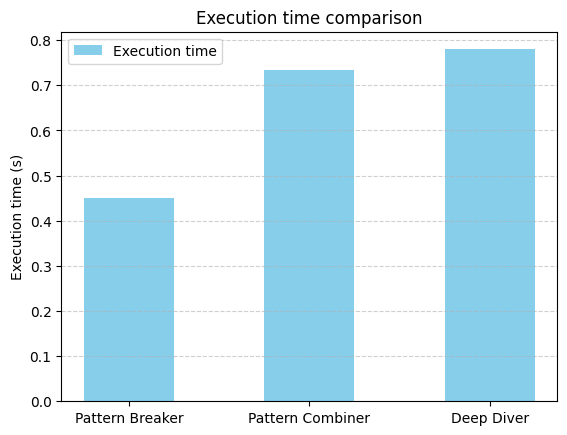

   Pattern Breaker  Pattern Combiner  Deep Diver
0         0.449751          0.733292     0.77975


In [42]:
# Time comparison (via graph)
import matplotlib.pyplot as plt
import numpy as np

# data
x = ['Pattern Breaker', 'Pattern Combiner', 'Deep Diver']
y = [pattern_breaker_time, pattern_combiner_time, deep_diver_time]

# plot
fig, ax = plt.subplots()
ax.bar(x, y, color='skyblue', align='center', width=0.5)
plt.ylabel('Execution time (s)')
plt.title('Execution time comparison')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(['Execution time'])
plt.show()

# Time comparison (via table)
import pandas as pd

data = {'Pattern Breaker': [pattern_breaker_time], 'Pattern Combiner': [pattern_combiner_time], 'Deep Diver': [deep_diver_time]}
df = pd.DataFrame(data)
print(df)